In [214]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Dataset

In [215]:
dataset = pd.read_csv('Newdataset.csv')

In [216]:
dataset

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
35197,35198,06/04/2020,Zacatecas,Mexico,2020-06-05 02:33:06,341.0,41.0,219.0
35198,35199,06/04/2020,Zakarpattia Oblast,Ukraine,2020-06-05 02:33:06,1257.0,28.0,524.0
35199,35200,06/04/2020,Zaporizhia Oblast,Ukraine,2020-06-05 02:33:06,469.0,14.0,269.0
35200,35201,06/04/2020,Zhejiang,Mainland China,2020-06-05 02:33:06,1268.0,1.0,1267.0


### Extracting India

In [217]:
final_dataset = dataset.loc[dataset['Country/Region'] == 'India']

In [218]:
final_dataset

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
430,431,01/30/2020,NaN,India,1/30/20 16:00,1.0,0.0,0.0
491,492,01/31/2020,NaN,India,1/31/2020 23:59,1.0,0.0,0.0
547,548,02/01/2020,NaN,India,1/31/2020 8:15,1.0,0.0,0.0
607,608,02/02/2020,NaN,India,2020-02-02T06:03:08,2.0,0.0,0.0
672,673,02/03/2020,NaN,India,2020-02-03T21:43:02,3.0,0.0,0.0
...,...,...,...,...,...,...,...,...
32063,32064,05/31/2020,NaN,India,2020-06-01 02:32:46,190609.0,5408.0,91852.0
32618,32619,06/01/2020,NaN,India,2020-06-02 02:33:08,198370.0,5608.0,95754.0
33282,33283,06/02/2020,NaN,India,2020-06-03 02:33:13,207191.0,5829.0,100285.0
33945,33946,06/03/2020,NaN,India,2020-06-04 02:33:14,216824.0,6088.0,104071.0


### Cases

In [219]:
cases = final_dataset.iloc[:,5:6]

In [220]:
dateduration = final_dataset.iloc[:,1:2]

In [221]:
cases

,Confirmed
430,1.0
491,1.0
547,1.0
607,2.0
672,3.0
...,...
32063,190609.0
32618,198370.0
33282,207191.0
33945,216824.0


In [222]:
dateduration

,ObservationDate
430,01/30/2020
491,01/31/2020
547,02/01/2020
607,02/02/2020
672,02/03/2020
...,...
32063,05/31/2020
32618,06/01/2020
33282,06/02/2020
33945,06/03/2020


In [223]:
from datetime import datetime

In [224]:
date_format = "%m/%d/%Y"

In [225]:
def split_date(dateduration):
    new_dates = []
    column = dateduration.iloc[0:]['ObservationDate']
    for i in column:
        a = datetime.strptime(i, date_format)
        b = datetime.strptime('01/30/2020', date_format)
        new_dates.append((a-b).days)
    return pd.DataFrame(np.array(new_dates))

In [226]:
new_input = split_date(dateduration)

### Plotting

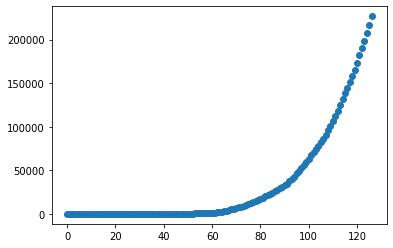

In [227]:
plt.plot(new_input , cases , 'o')
plt.show()

In [228]:
from sklearn.preprocessing import PolynomialFeatures

In [229]:
poly_reg = PolynomialFeatures(degree = 3)

In [230]:
poly_matrix = poly_reg.fit_transform(new_input)

In [231]:
pd.DataFrame(poly_matrix)

,0,1,2,3
0,1.0,0.0,0.0,0.0
1,1.0,1.0,1.0,1.0
2,1.0,2.0,4.0,8.0
3,1.0,3.0,9.0,27.0
4,1.0,4.0,16.0,64.0
...,...,...,...,...
122,1.0,122.0,14884.0,1815848.0
123,1.0,123.0,15129.0,1860867.0
124,1.0,124.0,15376.0,1906624.0
125,1.0,125.0,15625.0,1953125.0


In [232]:
from sklearn.linear_model import LinearRegression

In [233]:
reg = LinearRegression()

In [234]:
reg.fit(poly_matrix , cases)

LinearRegression()

In [235]:
reg.coef_

array([[ 0.00000000e+00,  1.31540338e+03, -4.15526801e+01,
         3.59135869e-01]])

In [236]:
reg.intercept_

array([-8517.59954534])

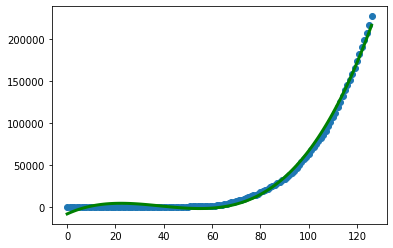

In [237]:
plt.plot(new_input , cases , 'o')
plt.plot(new_input , reg.predict(poly_matrix) , color = 'green' , linewidth = '3')
plt.show()

### Predicting

In [239]:
reg.predict(poly_reg.fit_transform(np.array([200]).reshape(-1,1)))
# 200 days after 1/30/2020

array([[1465542.82209174]])